In [1]:
#import sklearn

# Dataset loading
### Caution: Manipulating your Pandas data will be different.
### This is a toy dataset provided by sklearn, it's in a format sklearn understands.

In [2]:
# Just some example data provided by sklearn (Similar to how we used iris for seaborn plotting)
from sklearn.datasets import load_iris # From module import function.
iris_dataset = load_iris()

In [3]:
iris_dataset.data # Our X. Input. 4 features.

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris_dataset.target # Target Y, classification index.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris_dataset.target_names # What does 0, 1, 2 relate to?

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
model = DecisionTreeClassifier() # Make a new model.

In [8]:
# Our model is initialised, but not yet trained (fit)
model.predict( iris_dataset.data[0] ) # Array indexing to grab first row.

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
print( len(iris_dataset.data) )

### Simple linear split and fit.
### Not ideal!

In [ ]:
# Array[ : ] is a slice. Eg 3:6 (3 to 6)
# data[:100] = first 100 data points
model = model.fit(X=iris_dataset.data[:100], y=iris_dataset.target[:100]) # Model is now trained, and returned as model variable

In [ ]:
# Support pretty printing showing parameters of the model.
model

In [ ]:
# Uh Oh. Predict expects 2D input, but we only gave it [5.1, 3.5, 1.4, 0.2]
model.predict( iris_dataset.data[0] )

In [ ]:
print( type(iris_dataset.data[0]) )

In [ ]:
print( iris_dataset.data[0].shape ) # (4, ) NOT 2D

In [ ]:
# Reshape it 
print( iris_dataset.data[0].reshape(-1,4).shape ) # (1, 4)

# Reshape, first dimension = -1 -> -1 is special. Numpy figures it out (usually how many records we have)
#          second dimension = 4 -> We have 4 features per data point.
# Reshape just moves things around into a better format. Cannot make data up.

In [ ]:
model.predict( iris_dataset.data[0].reshape(-1, 4) )

In [ ]:
print(type( iris_dataset.data )) # Already 2D, Doesn't need reshaping!
pred_y = model.predict( iris_dataset.data )
print(pred_y)

In [ ]:
for cls_indx in pred_y:
    print(iris_dataset.target_names[ cls_indx ]) # Class index 0 = Setosa. See target_names from before.

# Plot your tree

In [9]:
from sklearn.tree import plot_tree # Only available in Scikit-learn >= 0.21

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

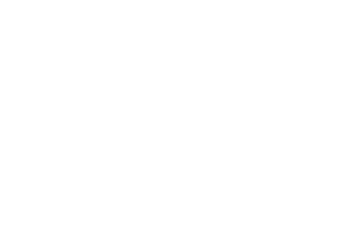

In [10]:
plot_tree( model, feature_names=iris_dataset.feature_names )